In [1]:
# Calling librarries

import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv("diamonds (cleaned).csv")

In [3]:
df.head(3)

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [5]:
# Missing values

missing_col=df.isnull().sum()
missing_col=missing_col[missing_col>0]

if not missing_col.empty:
    print(f"Missing Values:\n{missing_col}")
else:
    print("No missing Values")

Missing Values:
Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                  20
Width                   20
Height                  20
Fluorescence          5264
dtype: int64


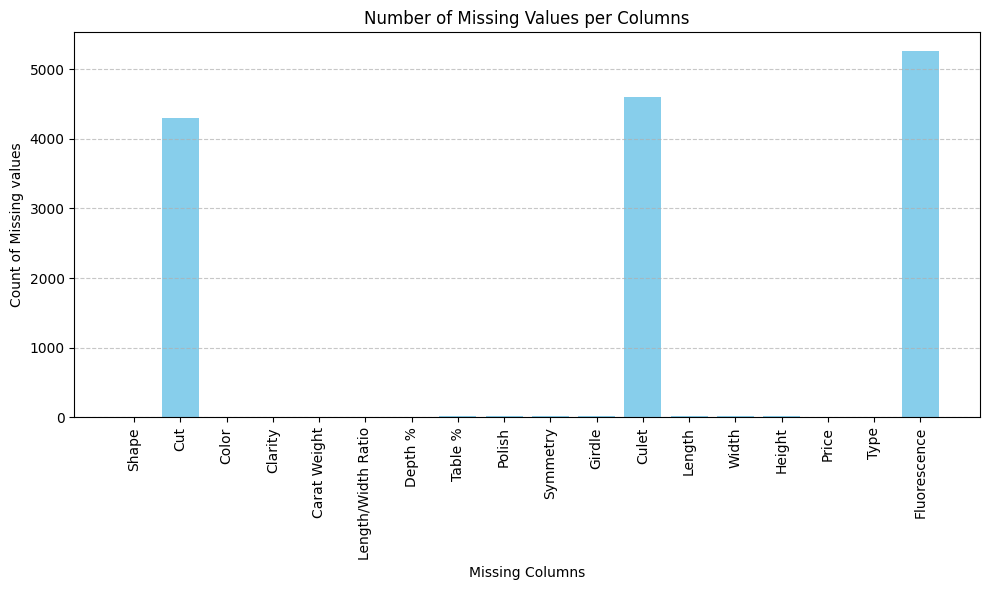

In [ ]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]
plt.figure(figsize=(10,6))
plt.bar(missing_values.index,missing_values.values,color="skyblue")
plt.title("Number of Missing Values per Columns")
plt.xlabel("Missing Columns")
plt.ylabel("Count of Missing values")
plt.xticks(rotation=90)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

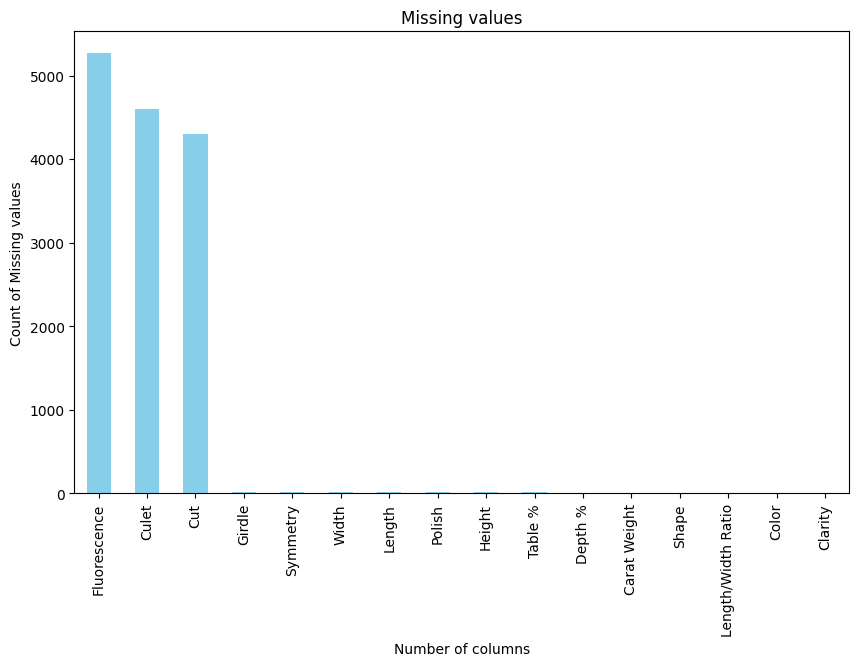

In [41]:
# Counts missing values for each column(Visual ko'rinish)

missing_count=df.isnull().sum()
missing_count[missing_count>0].sort_values(ascending=False).plot(kind="bar",figsize=(10,6),color="skyblue")
plt.title("Missing values")
plt.ylabel("Count of Missing values")
plt.xlabel("Number of columns")
#plt.grid(axis="y",linestyle="--",alpha=0.7)
#plt.tight_layout()
plt.show()

# Data processing

In [7]:
# Cleaning duplicated rows with Klib

df_cleaned=klib.data_cleaning(df)

Shape of cleaned data: (6482, 18) - Remaining NAs: 14327


Dropped rows: 3
     of which 3 duplicates. (Rows (first 150 shown): [1770, 4118, 6084])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 5
Reduced memory by at least: 0.63 MB (-70.79%)



In [8]:
df=df_cleaned

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   shape               6477 non-null   category
 1   cut                 2180 non-null   category
 2   color               6477 non-null   category
 3   clarity             6477 non-null   category
 4   carat_weight        6477 non-null   float32 
 5   length_width_ratio  6477 non-null   float32 
 6   depth_percent       6475 non-null   float32 
 7   table_percent       6465 non-null   float32 
 8   polish              6462 non-null   category
 9   symmetry            6462 non-null   category
 10  girdle              6460 non-null   category
 11  culet               1889 non-null   category
 12  length              6462 non-null   float32 
 13  width               6462 non-null   float32 
 14  height              6462 non-null   float32 
 15  price               6482 non-null   in

In [10]:
# Cleaning Missing values with mean(),mode()

missing_col=df.columns[df.isnull().sum()>0]

for col in missing_col:
    if df[col].dtype=="category":
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)
        


/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_7627/3592887669.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
/var/folders/kx/n6bh82zd3w5_blhwkxh6d2440000gn/T/ipykernel_7627/3592887669.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [11]:
df.head(3)

,shape,cut,color,clarity,carat_weight,length_width_ratio,depth_percent,table_percent,polish,symmetry,girdle,culet,length,width,height,price,type,fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.800003,59.0,Excellent,Very Good,Medium to Thick,Pointed,7.09,6.95,4.57,2640,GIA Lab-Grown,Faint
1,Pear,Ideal,E,VS1,1.20,1.65,62.500000,58.0,Very Good,Very Good,Medium to Thick,Pointed,9.64,5.86,3.66,1070,GIA Lab-Grown,Faint
2,Oval,Ideal,E,VS1,1.19,1.41,63.099998,63.0,Very Good,Very Good,Medium to Thick,Pointed,8.44,6.00,3.79,1070,GIA Lab-Grown,Faint


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   shape               6482 non-null   category
 1   cut                 6482 non-null   category
 2   color               6482 non-null   category
 3   clarity             6482 non-null   category
 4   carat_weight        6482 non-null   float32 
 5   length_width_ratio  6482 non-null   float32 
 6   depth_percent       6482 non-null   float32 
 7   table_percent       6482 non-null   float32 
 8   polish              6482 non-null   category
 9   symmetry            6482 non-null   category
 10  girdle              6482 non-null   category
 11  culet               6482 non-null   category
 12  length              6482 non-null   float32 
 13  width               6482 non-null   float32 
 14  height              6482 non-null   float32 
 15  price               6482 non-null   in

In [13]:
# Missing values

missing_col=df.isnull().sum()
missing_col=missing_col[missing_col>0]

if not missing_col.empty:
    print(f"Missing Values:\n{missing_col}")
else:
    print("No missing Values")

No missing Values


# Encoding

In [14]:
# Selecting categorical and Numerical columns

categorical_col=df.select_dtypes(include=["object","category"]).columns.tolist()
print(f"Categorical Columns:\n{categorical_col}")
print(f"\nTotal number of categorical columns:\n{len(categorical_col)}")

numerical_col=df.select_dtypes(include=["int32","float32"]).columns.tolist()
print(f"\nNumerical Columns:\n{numerical_col}")
print(f"\nTotal number of numerical columns:\n{len(numerical_col)}")

Categorical Columns:
['shape', 'cut', 'color', 'clarity', 'polish', 'symmetry', 'girdle', 'culet', 'type', 'fluorescence']

Total number of categorical columns:
10

Numerical Columns:
['carat_weight', 'length_width_ratio', 'depth_percent', 'table_percent', 'length', 'width', 'height', 'price']

Total number of numerical columns:
8


In [15]:
# Finding Cardinality

cardinality=df[categorical_col].nunique()
print(cardinality)

shape           11
cut              4
color            5
clarity          6
polish           3
symmetry         3
girdle          29
culet            5
type             3
fluorescence     3
dtype: int64


In [16]:
# Label Encoding
label_encoding=LabelEncoder()
columns_to_encode=["shape","girdle"]

for col in columns_to_encode:
    df[col]=label_encoding.fit_transform(df[col])

In [17]:
categorical_col=df.select_dtypes(include=["object","category"]).columns.tolist()
print(f"Categorical Columns:\n{categorical_col}")
print(f"\nTotal number of categorical columns:\n{len(categorical_col)}")

Categorical Columns:
['cut', 'color', 'clarity', 'polish', 'symmetry', 'culet', 'type', 'fluorescence']

Total number of categorical columns:
8


In [18]:
cardinality=df[categorical_col].nunique()
print(cardinality)

cut             4
color           5
clarity         6
polish          3
symmetry        3
culet           5
type            3
fluorescence    3
dtype: int64


In [19]:
# One-Hot encoding
# get_dummies

one_hot_encoder=pd.get_dummies(df,columns=categorical_col,drop_first=False)
one_hot_encoder

,shape,carat_weight,length_width_ratio,depth_percent,table_percent,girdle,length,width,height,price,...,culet_Pointed,culet_Small,culet_Very Large,culet_Very Small,type_GIA,type_GIA Lab-Grown,type_IGI Lab-Grown,fluorescence_Faint,fluorescence_Medium,fluorescence_Strong
0,1,1.84,1.02,65.800003,59.0,7,7.09,6.95,4.57,2640,...,True,False,False,False,False,True,False,True,False,False
1,6,1.20,1.65,62.500000,58.0,7,9.64,5.86,3.66,1070,...,True,False,False,False,False,True,False,True,False,False
2,5,1.19,1.41,63.099998,63.0,7,8.44,6.00,3.79,1070,...,True,False,False,False,False,True,False,True,False,False
3,3,1.00,1.18,61.700001,58.0,13,5.85,6.89,4.25,7110,...,True,False,False,False,True,False,False,True,False,False
4,8,1.01,1.35,69.400002,66.0,14,6.80,5.05,3.50,3050,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,6,1.02,1.54,62.900002,63.0,16,8.60,5.59,3.51,3760,...,True,False,False,False,True,False,False,False,True,False
6478,3,1.00,1.16,58.299999,59.0,13,6.05,6.99,4.07,4710,...,True,False,False,False,True,False,False,False,False,True
6479,7,1.03,1.01,72.599998,71.0,6,5.59,5.51,4.00,3270,...,True,False,False,False,True,False,False,True,False,False
6480,8,1.06,1.43,67.800003,62.0,12,7.24,5.05,3.42,1050,...,True,False,False,False,False,True,False,True,False,False


In [20]:
df=one_hot_encoder

In [21]:
df.head(1)

,shape,carat_weight,length_width_ratio,depth_percent,table_percent,girdle,length,width,height,price,...,culet_Pointed,culet_Small,culet_Very Large,culet_Very Small,type_GIA,type_GIA Lab-Grown,type_IGI Lab-Grown,fluorescence_Faint,fluorescence_Medium,fluorescence_Strong
0,1,1.84,1.02,65.800003,59.0,7,7.09,6.95,4.57,2640,...,True,False,False,False,False,True,False,True,False,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   shape                6482 non-null   int64  
 1   carat_weight         6482 non-null   float32
 2   length_width_ratio   6482 non-null   float32
 3   depth_percent        6482 non-null   float32
 4   table_percent        6482 non-null   float32
 5   girdle               6482 non-null   int64  
 6   length               6482 non-null   float32
 7   width                6482 non-null   float32
 8   height               6482 non-null   float32
 9   price                6482 non-null   int32  
 10  cut_Astor            6482 non-null   bool   
 11  cut_Excellent        6482 non-null   bool   
 12  cut_Ideal            6482 non-null   bool   
 13  cut_Very Good        6482 non-null   bool   
 14  color_D              6482 non-null   bool   
 15  color_E              6482 non-null   b

In [23]:
df=df.astype(int) # qo'shimcha ochilgan ustunlarni hammasini booleandan int ga o'tkazish

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   shape                6482 non-null   int64
 1   carat_weight         6482 non-null   int64
 2   length_width_ratio   6482 non-null   int64
 3   depth_percent        6482 non-null   int64
 4   table_percent        6482 non-null   int64
 5   girdle               6482 non-null   int64
 6   length               6482 non-null   int64
 7   width                6482 non-null   int64
 8   height               6482 non-null   int64
 9   price                6482 non-null   int64
 10  cut_Astor            6482 non-null   int64
 11  cut_Excellent        6482 non-null   int64
 12  cut_Ideal            6482 non-null   int64
 13  cut_Very Good        6482 non-null   int64
 14  color_D              6482 non-null   int64
 15  color_E              6482 non-null   int64
 16  color_F              648

In [26]:
categorical_col=df.select_dtypes(include=["object","category"]).columns.tolist()
print(f"Categorical Columns:\n{categorical_col}")
print(f"\nTotal number of categorical columns:\n{len(categorical_col)}")

numerical_col=df.select_dtypes(include=["int64","float64"]).columns.tolist()
print(f"\nNumerical Columns:\n{numerical_col}")
print(f"\nTotal number of numerical columns:\n{len(numerical_col)}")

Categorical Columns:
[]

Total number of categorical columns:
0

Numerical Columns:
['shape', 'carat_weight', 'length_width_ratio', 'depth_percent', 'table_percent', 'girdle', 'length', 'width', 'height', 'price', 'cut_Astor', 'cut_Excellent', 'cut_Ideal', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'clarity_FL', 'clarity_IF', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'polish_Excellent', 'polish_Good', 'polish_Very Good', 'symmetry_Excellent', 'symmetry_Good', 'symmetry_Very Good', 'culet_Medium', 'culet_Pointed', 'culet_Small', 'culet_Very Large', 'culet_Very Small', 'type_GIA', 'type_GIA Lab-Grown', 'type_IGI Lab-Grown', 'fluorescence_Faint', 'fluorescence_Medium', 'fluorescence_Strong']

Total number of numerical columns:
42


In [27]:
min_max_scaler=MinMaxScaler()
df_mim_max_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)


In [28]:
df=df_mim_max_scaled
df.head(3)

,shape,carat_weight,length_width_ratio,depth_percent,table_percent,girdle,length,width,height,price,...,culet_Pointed,culet_Small,culet_Very Large,culet_Very Small,type_GIA,type_GIA Lab-Grown,type_IGI Lab-Grown,fluorescence_Faint,fluorescence_Medium,fluorescence_Strong
0,0.1,0.0,0.0,0.612903,0.296296,0.25,0.2,0.2,0.333333,0.042393,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.6,0.0,0.0,0.516129,0.259259,0.25,0.4,0.1,0.166667,0.001560,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.5,0.0,0.0,0.548387,0.444444,0.25,0.3,0.2,0.166667,0.001560,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Training Process

In [29]:
# data selecting 

x=df.drop("price",axis=1)# Future (Input)

In [30]:
y=df["price"] # Target variable (Output)

In [31]:
x.head()

,shape,carat_weight,length_width_ratio,depth_percent,table_percent,girdle,length,width,height,cut_Astor,...,culet_Pointed,culet_Small,culet_Very Large,culet_Very Small,type_GIA,type_GIA Lab-Grown,type_IGI Lab-Grown,fluorescence_Faint,fluorescence_Medium,fluorescence_Strong
0,0.1,0.0,0.0,0.612903,0.296296,0.250000,0.2,0.2,0.333333,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.6,0.0,0.0,0.516129,0.259259,0.250000,0.4,0.1,0.166667,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.5,0.0,0.0,0.548387,0.444444,0.250000,0.3,0.2,0.166667,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.3,0.0,0.0,0.483871,0.259259,0.464286,0.0,0.2,0.333333,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.0,0.0,0.741935,0.555556,0.500000,0.1,0.1,0.166667,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [32]:
y.head()


0    0.042393
1    0.001560
2    0.001560
3    0.158648
4    0.053056
Name: price, dtype: float64

In [33]:
# data splitting 

x_train,x_temp,y_train,y_temp=train_test_split(x,y, test_size=0.3, random_state=42)  

x_test, x_val, y_test, y_val=train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)

In [34]:
print(x_train.shape)
print(y_train.shape)

(4537, 41)
(4537,)


In [35]:
print(x_test.shape)
print(y_test.shape)

(972, 41)
(972,)


In [70]:
print(y_val.shape)
print(y_test.shape)

(649,)
(648,)


In [36]:
# Model selection

model=DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()

In [37]:
y_pred=model.predict(x_test)

In [38]:
y_test[:5]

2018    0.001821
6063    0.051756
4666    0.005202
5038    0.108713
3204    0.081664
Name: price, dtype: float64

In [40]:
y_pred[:5]

array([0.00268747, 0.04421326, 0.0023407 , 0.12054616, 0.08010403])

In [41]:
# Metrics

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error:\n{mse:.2f}")
print(f"R2 Score:\n{r2:.2f}")

Mean Squared Error:
0.00
R2 Score:
0.75


In [43]:
kf=KFold(n_splits=5, shuffle=True,random_state=42)

In [44]:
cv_score_lr=cross_val_score(model,x_train,y_train,cv=kf,scoring="r2")
cv_score_lr_mean=np.mean(cv_score_lr)

print(f"Linear Regression Cross validation R2: {cv_score_lr_mean:.2f}")

Linear Regression Cross validation R2: 0.63
